# Homework 2 Solution: Image Manipulation

## Task 0

### Completed by:  \<your name\>

## Task 1

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Task 2a

In [4]:
img_png = plt.imread("img1.png")
img_jpg = plt.imread("img1.jpg")

## Task 2b

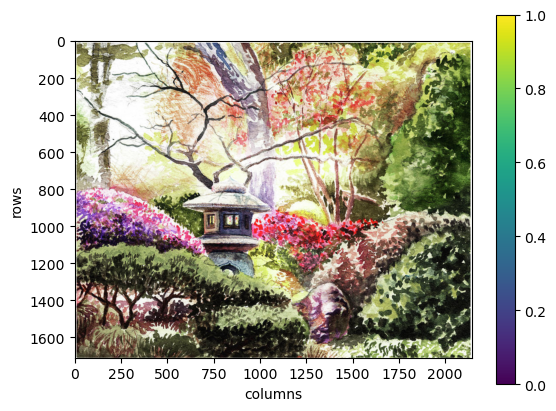

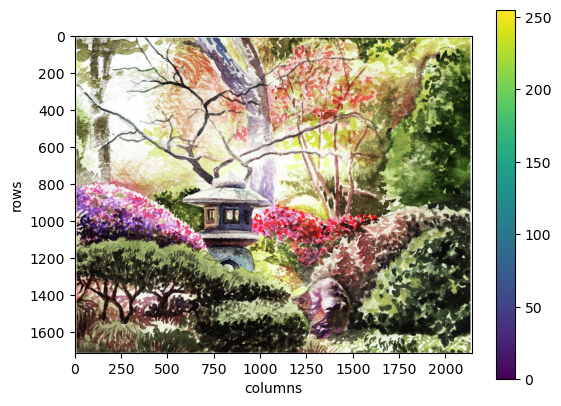

In [5]:
def display_image(img):
    # draw the image in the Figure 
    plt.imshow(img)

    # set the axis labels of the Figure
    plt.xlabel('columns')
    plt.ylabel('rows')

    # add a colorbar legend
    plt.colorbar()

    # display the Figure
    # this should be called at the end after we have set 
    # the properties and plotted the image(s)
    plt.show()
    
display_image(img_png)

display_image(img_jpg)

## Task 2c

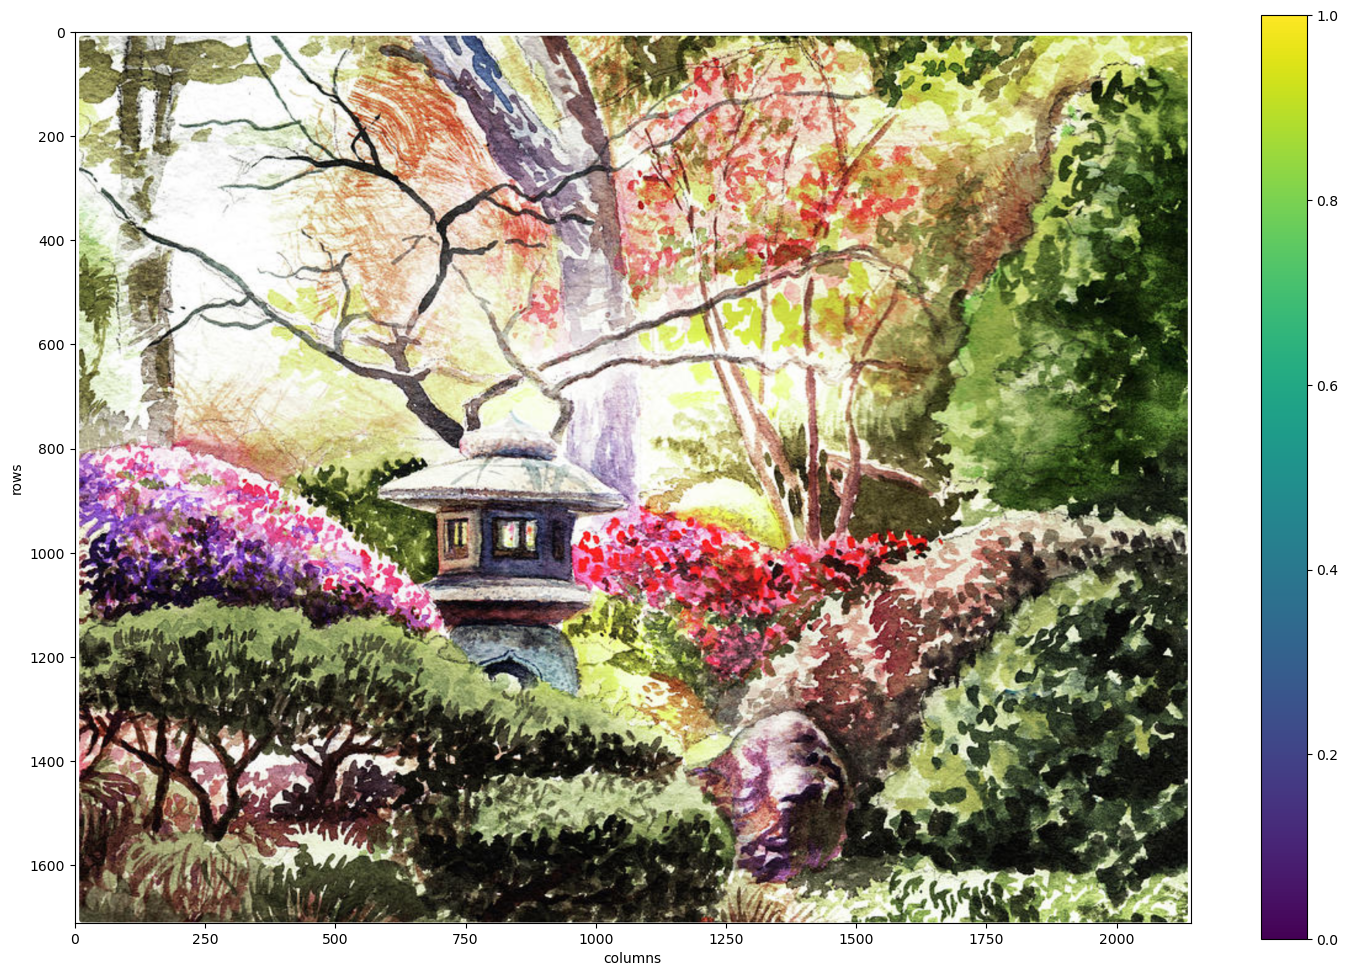

In [6]:
# Resizing of image

plt.figure(figsize=(18, 12))

display_image(img_png)

## Task 3

In [7]:
type(img_png)

numpy.ndarray

## Task 4

In [8]:
print(img_png.shape)
# can also write print(np.shape(img_png))
# many methods are also written as functions and vice versa

print(img_jpg.shape)


(1711, 2143, 4)
(1710, 2142, 3)


Answer:\
the 3rd dimension is of length 4 for png and 3 for jpg

## Task 5

In [9]:
print(f"The PNG image consists of {img_png.shape[0] * img_png.shape[1]} pixels")
print(f"The JPG image consists of {img_jpg.shape[0] * img_jpg.shape[1]} pixels")

The PNG image consists of 3666673 pixels
The JPG image consists of 3662820 pixels


## Task 6

In [10]:
# RGB values for png are given as a float, each betwen 0.0 - 1.0
print(f"The value at [55,80] of the png is : {img_png[55,80]}")

print(f"The datatype of the 3rd axis values of the png image is : {img_png[55,80].dtype}")
print()

# RGB values for jpg are given as an unsigned int uint, each betwen 0 - 255
print(f"The value at [55,80] of the jpg is : {img_jpg[55,80]}")
print(f"The datatype of the 3rd axis values of the jpg image is : {img_jpg[55,80].dtype}")

The value at [55,80] of the png is : [0.9843137  0.99215686 0.972549   1.        ]
The datatype of the 3rd axis values of the png image is : float32

The value at [55,80] of the jpg is : [252 253 248]
The datatype of the 3rd axis values of the jpg image is : uint8


## Task 7

In [11]:
# using a NumPy function - np.mean(ndarray) or ndarray.mean()

print(np.mean(img_png, axis=(0,1))[0:3])
#OR
print(img_png[:,:,0:3].mean(axis=(0,1)))

[0.5920364  0.54945433 0.45054728]
[0.5920364  0.54945433 0.45054728]


## Task 8a

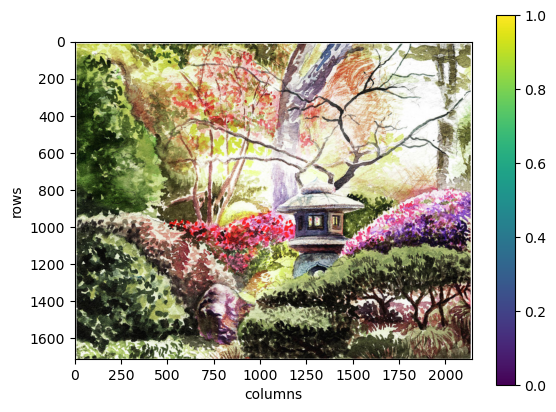

In [12]:
# flip horizontally using indexing

img_hflip = img_png[:,::-1,:]
#or
img_hflip = img_png[:,img_png.shape[1]-1:0:-1,:]

display_image(img_hflip)


## Task 8b

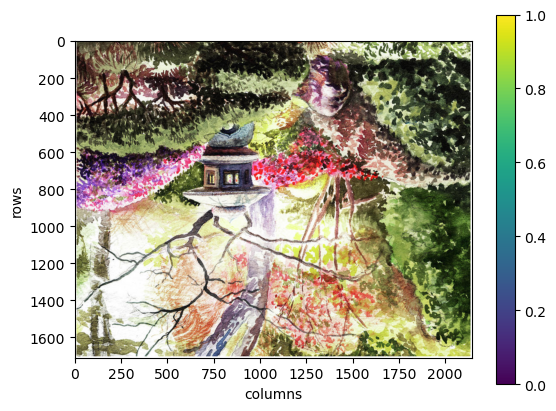

In [13]:
# flip vertically
img_vflip = np.flip(img_png, axis = 0)
#OR
img_vflip = np.flipud(img_png)

display_image(img_vflip)

## Task 9

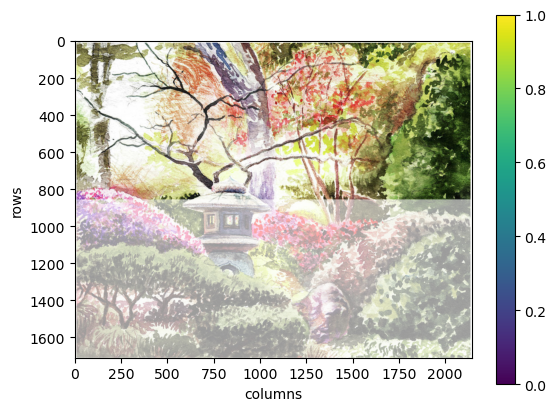

In [26]:
img_png_transp = img_png.copy()

img_png_transp[int(img_png_transp.shape[0] / 2) : , :, 3] = 0.4
#OR
img_png_transp[img_png_transp.shape[0] // 2 : , :, 3] = 0.4

display_image(img_png_transp)


## Task 10

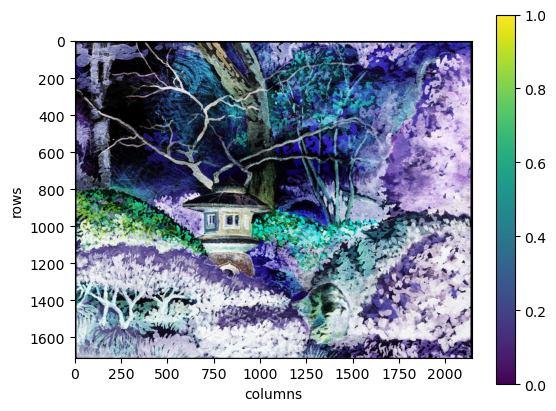

In [15]:
# you can subtract one by one

img_png_neg1 = img_png.copy() 

img_png_neg1[:, :, 0] = 1 - img_png[:, :, 0]
img_png_neg1[:, :, 1] = 1 - img_png[:, :, 1]
img_png_neg1[:, :, 2] = 1 - img_png[:, :, 2]

display_image(img_png_neg1)

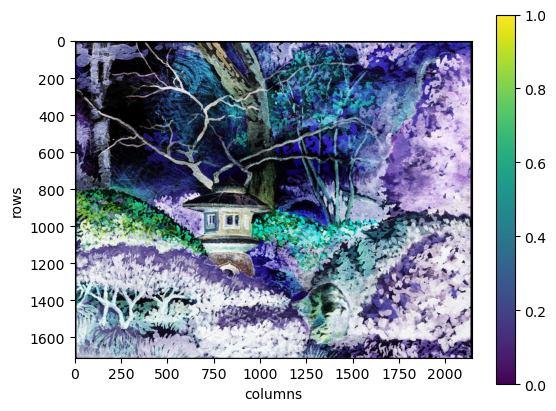

In [16]:
# OR you can subtract all three colors at the same time
# by taking advantage of broadcasting 
img_png_neg2 = img_png.copy() 
img_png_neg2[:, :, 0:3] = 1 - img_png[:, :, 0:3]

display_image(img_png_neg2)


## Task 11

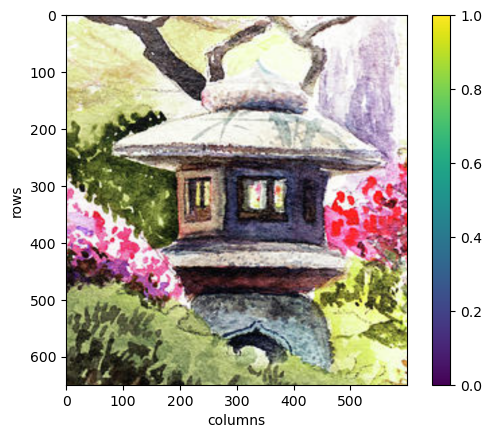

In [17]:
img_png_crop = img_png[650:1300, 500:1100, :]

display_image(img_png_crop)

In [18]:
img_png[:, :, :3].shape


(1711, 2143, 3)

##  TASK 12

(1711, 2143)


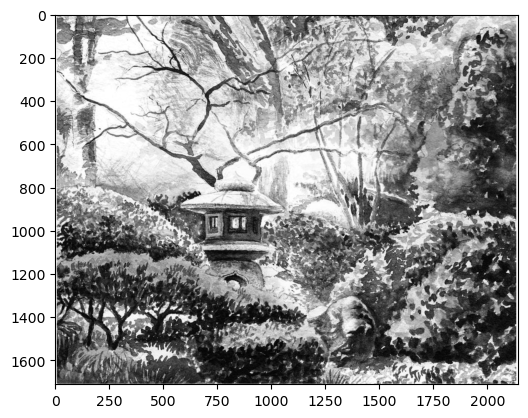

In [19]:
# convert to grayscale
# writing a function is optional

def grayscale(image, xw=0.21, yw=0.72, zw=0.07):
    #return np.dot(img_png[:, :, :3] , [xw, yw , zw])
    #OR
    return np.matmul(img_png[:, :, :3] , [xw, yw , zw])

gray_img = grayscale(img_png)
print(gray_img.shape)

plt.imshow(gray_img, cmap ='gray')
plt.show()

## Task 13

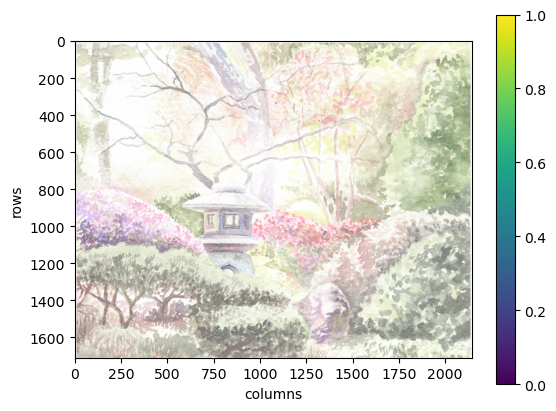

In [20]:
gamma = 1/5
img_png_light = ((img_png[:, :, 0:3])**(gamma))
display_image(img_png_light)

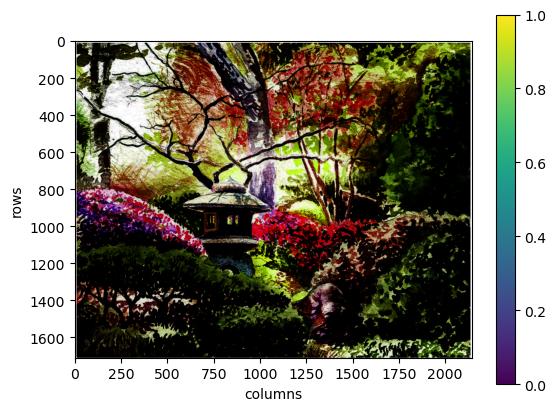

In [21]:
img_png_dark = ((img_png[:, :, 0:3])**(1/gamma))
display_image(img_png_dark)

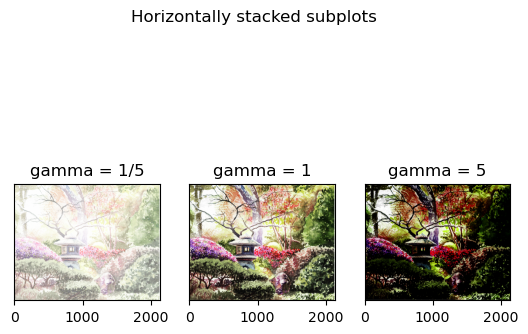

In [22]:
# OPTIONAL - plot using subplots
# We will write new display code here since we cannot use the function in Task 2b.

fig, ax = plt.subplots(1, 3)
fig.suptitle('Horizontally stacked subplots', size = 12)

ax[0].set_title('gamma = 1/5')
ax[1].set_title('gamma = 1')
ax[2].set_title('gamma = 5')

ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])

ax[0].imshow(img_png_light)
ax[1].imshow(img_png)
ax[2].imshow(img_png_dark)

## TASK 14

In [23]:
img_png_Red = img_png.copy()
img_png_Red[:, :, [1,2]] = 0

img_png_Green = img_png.copy()
img_png_Green[:, :, [0,2]] = 0

img_png_Blue = img_png.copy()
img_png_Blue[:, :, [0,1]] = 0


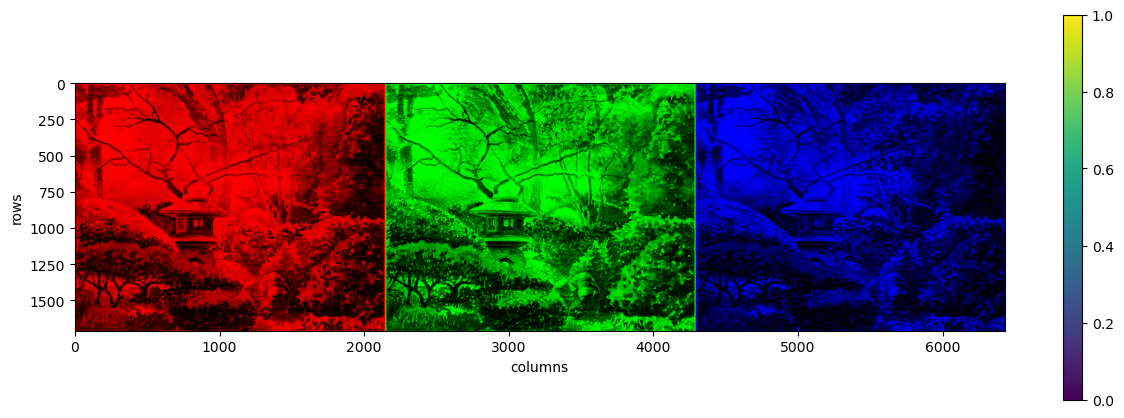

In [24]:
img_png_RGB = np.concatenate((img_png_Red, img_png_Green, img_png_Blue), axis =1)
#or
img_png_RGB = np.hstack([img_png_Red, img_png_Green, img_png_Blue])

plt.figure(figsize=(15, 5))
display_image(img_png_RGB)

# THE END